In [6]:
from paths import *
from utils import *

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style='ticks', palette='Set2')

In [11]:
# Read the graded vignettes
vignettes15_exact = pd.read_excel(PROCESSED/'vignettes15_triage_prediction_agg_exact.xlsx')
vignettes20_exact = pd.read_excel(PROCESSED/'vignettes20_triage_prediction_agg_exact.xlsx')
vignettes20_dich = pd.read_excel(PROCESSED/'vignettes20_triage_prediction_agg_dichotomized.xlsx')

def preprocess(vignettes_pred: pd.DataFrame) -> pd.DataFrame:
    
    # Remove NA columns
    vignettes_pred = vignettes_pred.dropna().reset_index(drop=True)
    
    # Drop redundant columns
    vignettes_pred.drop(["Predicted Triage", "Number of Predictions", "Average Probability"], 
                          inplace=True, axis=1)
    
    
    return vignettes_pred
    
vignettes15_exact = preprocess(vignettes15_exact)
vignettes20_exact = preprocess(vignettes20_exact)
vignettes20_dich = preprocess(vignettes20_dich)

# Vignettes 2015

In [12]:
print("Exact Match Accuracy:", vignettes15_exact['Correct(Yes/No)'].value_counts()['Yes'] / vignettes15_exact.shape[0])

Exact Match Accuracy: 0.4888888888888889


# Vignettes 2020

In [13]:
print("Exact Match Accuracy:", vignettes20_exact['Correct(Yes/No)'].value_counts()['Yes'] / vignettes20_exact.shape[0])
print("Dichotomized Accuracy:", vignettes20_dich['Correct(Yes/No)'].value_counts()['Yes'] / vignettes20_dich.shape[0])


Exact Match Accuracy: 0.40476190476190477
Dichotomized Accuracy: 0.8571428571428571


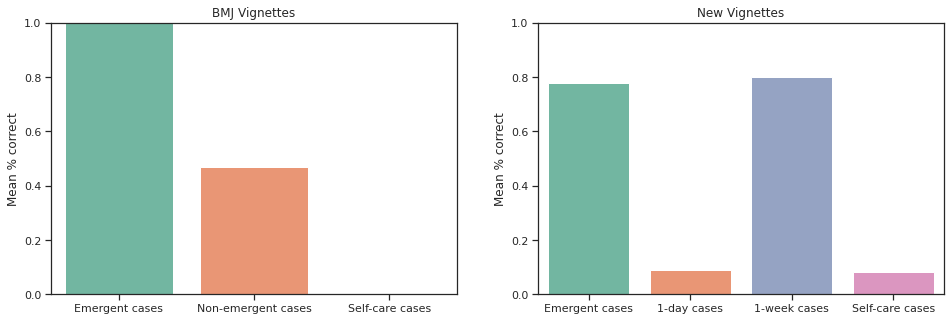

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))

for vign, ax in zip([vignettes15_exact, vignettes20_exact], axes):
    df = vign.groupby('Correct Triage')["Correct(Yes/No)"].agg(lambda s: (s=='Yes').mean())
    
    try:
        df = df.loc[['Emergent', '1-day', '1-week', 'Self-care']]
        title = 'New Vignettes'
        
    except KeyError:
        df = df.loc[['Emergent', 'Non-emergent', 'Self-care']]
        title = 'BMJ Vignettes'
        
    df.index = [(col + ' cases') for col in list(df.index)]
    sns.barplot(x=df.index, y=df.values, ax=ax, )
    ax.set_ylim((0,1))
    ax.set_title(title)
    ax.set_ylabel('Mean % correct')